# Assignment 1 - pandas
"00_01_Docker Python Pandas Lab.pptx" 참고
---------------------
----------------------------

#### < Assignment 1 구성 >
#### [0] 전체적인 문제 설명
#### [1] 문제풀이에 필요한 데이터 만들기 - 코드 full 제공
#### [2] 문제를 풀때 필요한 기능들 설명
#### [3] 3개의 문제
-------------------------------------

## [0] 전체적인 문제 설명
3/31 수업시간에 만들었던 dataframe형식의 데이터 "df_total" 의 몇가지 요소 확인

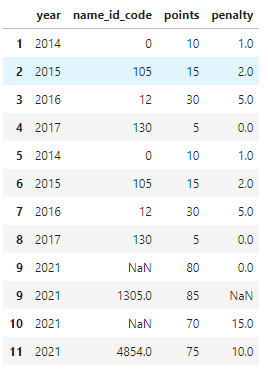 <- df_total

--------------
## [1] 문제풀이에 필요한 데이터 만들기 

0. 필요한 module import

In [1]:
import pandas as pd
import numpy as np

1. data 만들기  (아래처럼 데이터를 3개로 나눠서 따로 만든후 합치지 말고, df_total을 한번에 만들어도 됨)

In [2]:
# data생성
data ={"name_id_code": ['0', '105','12','130'],
     "year": [2014,2015,2016,2017],
     "points" :[10,15,30,5],
     "penalty" : [1,2,5,0]}
# 생성한 데이터를 pandas DataFrame 형식으로 변환
df = pd.DataFrame(data, columns =['year', 'name_id_code', 'points', 'penalty'], index=['1', '2', '3','4']) 

In [3]:
data_2 ={"name_id_code": ['1000', '1105','998','1001'],
     "year": [2018, 2019, 2020, 2021],
     "points" :[100, 90, 60, 55],
     "penalty" : [5, 10, 5, 5]}
df_2 = pd.DataFrame(data_2, columns =['year', 'name_id_code', 'points', 'penalty'], index=['5', '6', '7','8'])

In [4]:
data_3={"name_id_code": [np.nan, 1305, np.nan,4854],
       "year": [2021,2021,2021,2021],
       "points" : [80,85,70,75],
       "penalty": [0,np.nan, 15,10]}
df_3 = pd.DataFrame(data_3, columns =['year', 'name_id_code', 'points', 'penalty'], index=['9', '10', '11','12'])

In [5]:
# 위에서 생성한 3개의 dataframe 합치기
df_total = pd.concat([df, df_2, df_3], axis =0)
df_total #데이터 확인'

,year,name_id_code,points,penalty
1,2014,0,10,1.0
2,2015,105,15,2.0
3,2016,12,30,5.0
4,2017,130,5,0.0
5,2018,1000,100,5.0
6,2019,1105,90,10.0
7,2020,998,60,5.0
8,2021,1001,55,5.0
9,2021,NaN,80,0.0
10,2021,1305.0,85,NaN


-----
## [2] pandas.DataFrame의 추가 기능들 -과제에 필요

#### 1. count() : 각 column에 몇 개의 데이터가 있는지 반환한다. (NaN값은 세지 않음)
- 전체 data의 각 column에 몇 개의 데이터가 있는지 반환
>df.count()


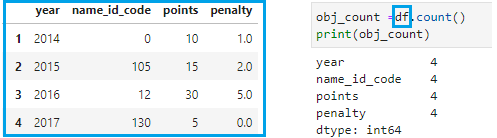

- 특정 column에 몇 개의 데이터가 있는지 반환 (ex) year)
> df['year'].count()


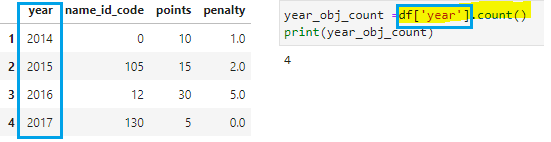

#### 2. size : 총 데이터에 NaN을 포함하여 총 몇개의 데이터가 있는지 반환한다. 
> df['year'].size


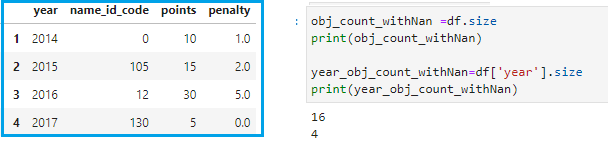

-------------

## Question 1
### df_total 에서 각 컬럼마다 Nan 비율 확인
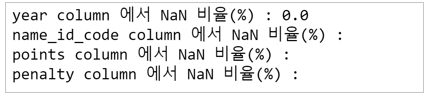

In [38]:
# sol - 비율을 구하기 위한 식 - pandas dataframe 기능 이용

year_nan_ratio = df_total['year'].isna().sum()/df_total['year'].size*100
nameid_nan_ratio = df_total['name_id_code'].isna().sum()/df_total['name_id_code'].size*100
points_nan_ratio = df_total['points'].isna().sum()/df_total['points'].size*100
penalty_nan_ratio = df_total['penalty'].isna().sum()/df_total['penalty'].size*100

print('year columns 에서 NaN 비율(%%) : %.2f' %year_nan_ratio)
print("name_id_code column에서 NaN 비율(%%): %.2f" %nameid_nan_ratio)
print("points column에서 NaN 비율(%%): %.2f" %points_nan_ratio)
print("penalty column에서 NaN 비율(%%): %.2f" %penalty_nan_ratio)

year columns 에서 NaN 비율(%) : 0.00
name_id_code column에서 NaN 비율(%): 16.67
points column에서 NaN 비율(%): 0.00
penalty column에서 NaN 비율(%): 8.33


## Question 2
### df_total에서  points가 30점 이상 90점 이하인 데이터 선별 후, 전체 데이터에서 차지하는 비중 확인!
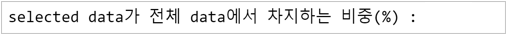df_total["points"] >=30

In [35]:
#sol- data를 선별하고, 개수를 구하여 비율 계산하기

selected_data = df_total[(df_total['points']>=30) & (df_total['points']<=90)]
selected_data_num = selected_data.size
selected_data_ratio = selected_data.size/df_total.size*100

print("selected data가 전체 data에서 차지하는 비율(%%): %.2f" %selected_data_ratio )              

selected data가 전체 data에서 차지하는 비율(%): 66.67


### Question 3 선별된 데이터에서(question2에서 선별한 데이터) penalty가 5점인, name_id_code 출력
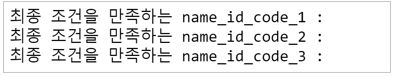

In [26]:
#sol - 2번문제에서 선별한 데이터에서 한번더 데이터 선별, name id code출력 

final_data = selected_data[selected_data['penalty']==5]
final_data_num = final_data['penalty'].size

for i in range(final_data_num):
    print("최종 조건을 만족하는 name_id_code_", i+1, ":", final_data['name_id_code'][i])

최종 조건을 만족하는 name_id_code_ 1 : 12
최종 조건을 만족하는 name_id_code_ 2 : 998
최종 조건을 만족하는 name_id_code_ 3 : 1001
